In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.loadtxt('dataset/Regression/UnivariateData/32.csv', delimiter=",")

In [3]:
data.shape

(1001, 2)

In [4]:
data

array([[0.982 , 2.9955],
       [0.864 , 2.9996],
       [0.237 , 3.49  ],
       ...,
       [0.771 , 2.995 ],
       [0.885 , 3.0142],
       [0.893 , 2.9362]])

In [5]:
def plot(data):
    x , y = data[:,0] , data[:,1]
    plt.scatter(x, y,edgecolors='black')  
    plt.title("Univariate Dataset")
    plt.xlabel("input axis")
    plt.ylabel("output axis")

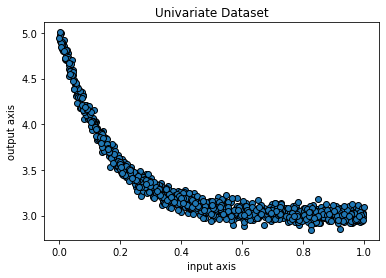

In [6]:
plot(data)

In [7]:
def train_test_split(data):
    train_ratio = 0.7 
    train_size = int(data.shape[0] * train_ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data

In [8]:
train_data, test_data = train_test_split(data)

In [11]:
print(train_data.shape)
print(test_data.shape)

(700, 2)
(301, 2)


In [12]:
def sigmoid(x):
    s = 1/(1+np.exp(-(x)))
    return s

In [15]:
np.random.seed(0)
def model_train(train_data,nodes):
    N, d = train_data.shape
    wh = 0.10*np.random.randn(2, nodes+1)
    wo = 0.10*np.random.randn(nodes+1, 1)
    epochs=250
    avg_err = []
    mse=[]
    epoch=0
    while(epochs):
        err = []        
        for i in range(N):
            y_op = train_data[i,1]
            xi = [1, train_data[i,0]] #Input layer
            
            a = np.dot(wh.T, xi) #hidden layer 1 out
            h = sigmoid(a) #hidden layer 1 activation out
            
            out = np.dot(wo.T, h) #Output layer out
            y_pred = out #Linear Output activation 
            
            en = sum(0.5*(y_op-y_pred)**2)
            err.append(en)
            
            neta = 0.05
            
            #Update weights
            wo = wo + (neta * np.outer(h, (y_op-y_pred)))
            
            var1 = np.dot(wo, (y_op-y_pred))
            var2 = h * (1-h)
            
            wh = wh + (neta * np.outer(xi, var1*var2))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        epoch+=1
        if epochs%1==0:
            print("Average Error at Epoch ",epoch," ",avg_error)
        epochs -= 1
        mse.append(np.sqrt(sum(err)/len(err)))
        
    return wh, wo, avg_err, h, y_pred, mse

In [16]:
wh, wo, avg_err, h1_out, output, mse = model_train(train_data,4)

Average Error at Epoch  1   0.12958606612676735
Average Error at Epoch  2   0.043184636375246756
Average Error at Epoch  3   0.04112362594306063
Average Error at Epoch  4   0.04102484084182382
Average Error at Epoch  5   0.040953444643450146
Average Error at Epoch  6   0.04087460041712953
Average Error at Epoch  7   0.04078745350137704
Average Error at Epoch  8   0.04068900846832854
Average Error at Epoch  9   0.04057474970471837
Average Error at Epoch  10   0.04043849077940747
Average Error at Epoch  11   0.04027189597881968
Average Error at Epoch  12   0.04006389058432289
Average Error at Epoch  13   0.03980008397586038
Average Error at Epoch  14   0.03946242046234272
Average Error at Epoch  15   0.03902941580834161
Average Error at Epoch  16   0.038477413311424104
Average Error at Epoch  17   0.03778309395038241
Average Error at Epoch  18   0.03692684557378033
Average Error at Epoch  19   0.035895818102807286
Average Error at Epoch  20   0.03468539138968054
Average Error at Epoch  2

Average Error at Epoch  166   0.0018016612474094282
Average Error at Epoch  167   0.0017993540144619533
Average Error at Epoch  168   0.0017970907345732548
Average Error at Epoch  169   0.0017948704729148024
Average Error at Epoch  170   0.0017926923177576113
Average Error at Epoch  171   0.0017905553797859018
Average Error at Epoch  172   0.001788458791435621
Average Error at Epoch  173   0.00178640170625669
Average Error at Epoch  174   0.0017843832982979801
Average Error at Epoch  175   0.0017824027615140306
Average Error at Epoch  176   0.0017804593091926026
Average Error at Epoch  177   0.0017785521734021853
Average Error at Epoch  178   0.001776680604458633
Average Error at Epoch  179   0.0017748438704101332
Average Error at Epoch  180   0.0017730412565396803
Average Error at Epoch  181   0.0017712720648845298
Average Error at Epoch  182   0.0017695356137717169
Average Error at Epoch  183   0.001767831237369139
Average Error at Epoch  184   0.0017661582852515213
Average Error at 

In [19]:
def test_model(test_data, wh,wo):
    N=len(test_data)
    a1_list=[]
    ao_list=[]
    y_pred_list = []
    err=[]
    for i in range(N):
        y_true = test_data[i, 1]
        op=sigmoid(np.dot(wh.T, [1, test_data[i, 0]]))
        a1_list.append(op)
        y_pred = np.dot(wo.T, op)  
        ao_list.append(y_pred)      
        e = (y_true-y_pred)**2
        
        y_pred_list.append(y_pred)
        err.append(e)
    mse=sum(err)/len(err)
    
    return y_pred_list,mse,ao_list,a1_list


In [20]:
y_pred_ts, msets,aols_ts,a1ls_ts = test_model(test_data, wh,wo)
y_pred_tr, msetr,aols_tr,a1ls_tr = test_model(train_data, wh,wo)
y_pred_all, mse_all,aols_all,a1ls_all = test_model(data, wh,wo)

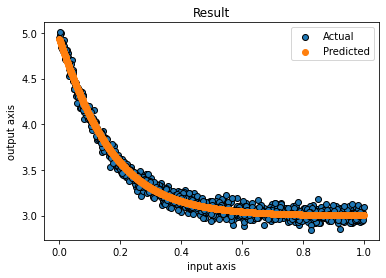

In [21]:
plt.scatter(data[:,0], data[:,1],edgecolors="black")
plt.scatter(data[:,0], y_pred_all)
plt.title("Result")
plt.xlabel("input axis")
plt.legend(["Actual","Predicted"])
plt.ylabel("output axis")
plt.show()

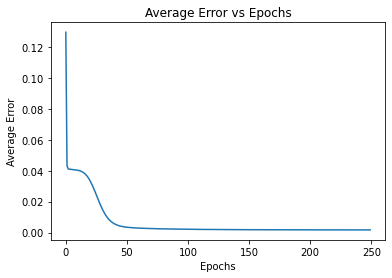

In [22]:
plt.plot(avg_err)
plt.title("Average Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.show()

<ipython-input-34-afbe736b0a73>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y=[np.asscalar(msetr),np.asscalar(msets)]


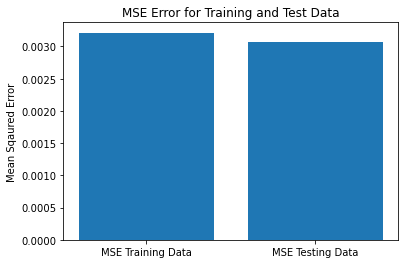

In [34]:
x=["MSE Training Data","MSE Testing Data"]
y=[np.asscalar(msetr),np.asscalar(msets)]

plt.bar(x,y)

plt.title("MSE Error for Training and Test Data")
plt.ylabel("Mean Sqaured Error")
plt.show()

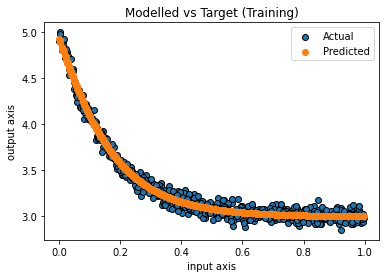

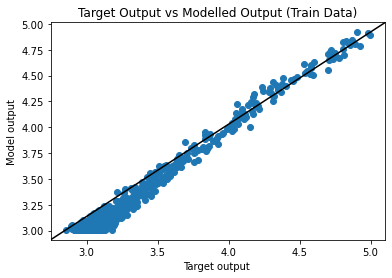

In [37]:
# Model vs Target Output for Training Data
plt.scatter(train_data[:,0], train_data[:,1],edgecolor='black')
plt.scatter(train_data[:,0],y_pred_tr)
plt.title("Modelled vs Target (Training)")
plt.legend(["Actual","Predicted"])
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.show()

fig, ax = plt.subplots()
plt.scatter( train_data[:,1],y_pred_tr)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Train Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.show()

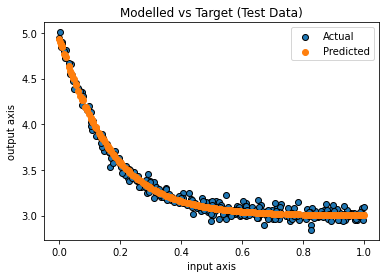

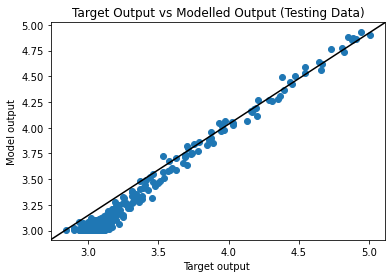

In [39]:
# Model vs Target Output for Testing Data
plt.scatter(test_data[:,0], test_data[:,1],edgecolors="black")
plt.scatter(test_data[:,0], y_pred_ts)
plt.title("Modelled vs Target (Test Data)")
plt.legend(["Actual","Predicted"])
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.show()

fig, ax = plt.subplots()
plt.scatter(test_data[:,1],y_pred_ts)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Testing Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.show()